In [ ]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()
c

In [5]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


In [12]:
config='NACHOS12.L75'
case='MAA4001'
freq='1d'
year='2010'

datadir='/scratch/cnt0024/hmg2840/albert7a/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/albert7aNACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75_coordinates.nc'
maskfile='/scratch/cnt0024/hmg2840/albert7a/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75_MAA40_mesh_mask.nc'

In [9]:
filesT=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridT.nc'))
#filesU=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridU.nc'))
#filesV=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_gridV.nc'))
#filesflx=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_flxT.nc'))
#filesice=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_icemod3.nc'))
#print(filesT)
#for file in filesT:
#    !ls $file

In [13]:
dsgrid=xr.open_dataset(gridfile)
dsT=xr.open_mfdataset(filesT)
#dsU=xr.open_mfdataset(filesU)
#dsV=xr.open_mfdataset(filesV)
#dsflx=xr.open_mfdataset(filesflx)
#dsice=xr.open_mfdataset(filesice)


In [14]:
tem=dsT.votemper
sal=dsT.vosaline
ssh=dsT.sossheig

lat=dsgrid.nav_lat
lon=dsgrid.nav_lon

#tem

In [33]:
tem.nbytes/1e9

109.409112

In [16]:
#def compute_EKE(u,v):
#    return eke
#def compute_mxl(tem,sal):
#    return mxl
#def compute_psi(u,v):
#    return psi


In [75]:
month_name={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
ax_nb={1:(0,0),2:(0,1),3:(0,1),4:(0,1),5:(0,1),6:(0,1),7:(0,1),8:(0,1),9:(0,1),10:'October',11:'November',12:('December')}
def plot_monthly(var,varname,vmin,vmax,cmap):
    fig, axes = plt.subplots(3,4,figsize=(30,20))
    axes = axes.ravel()
    for m in np.arange(1,13):
        if m < 10:
            month='0'+str(m)
        else:
            month=str(m)
        if m in [1,3,5,7,8,10,12]:
            dayf='31'
        elif m == 2:
            dayf='28'
        else:
            dayf='30'
        ax=axes[m-1]
        var.sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter').plot(cmap=cmap,ax=ax,vmin=vmin,vmax=vmax,add_labels=True)
        ax.set_title(month_name[m])
    fig.suptitle('Monthly mean of Surface'+str(varname))
    plt.savefig(config+'-'+case+'_y'+str(year)+'.1m_surf_'+varname+'.png')

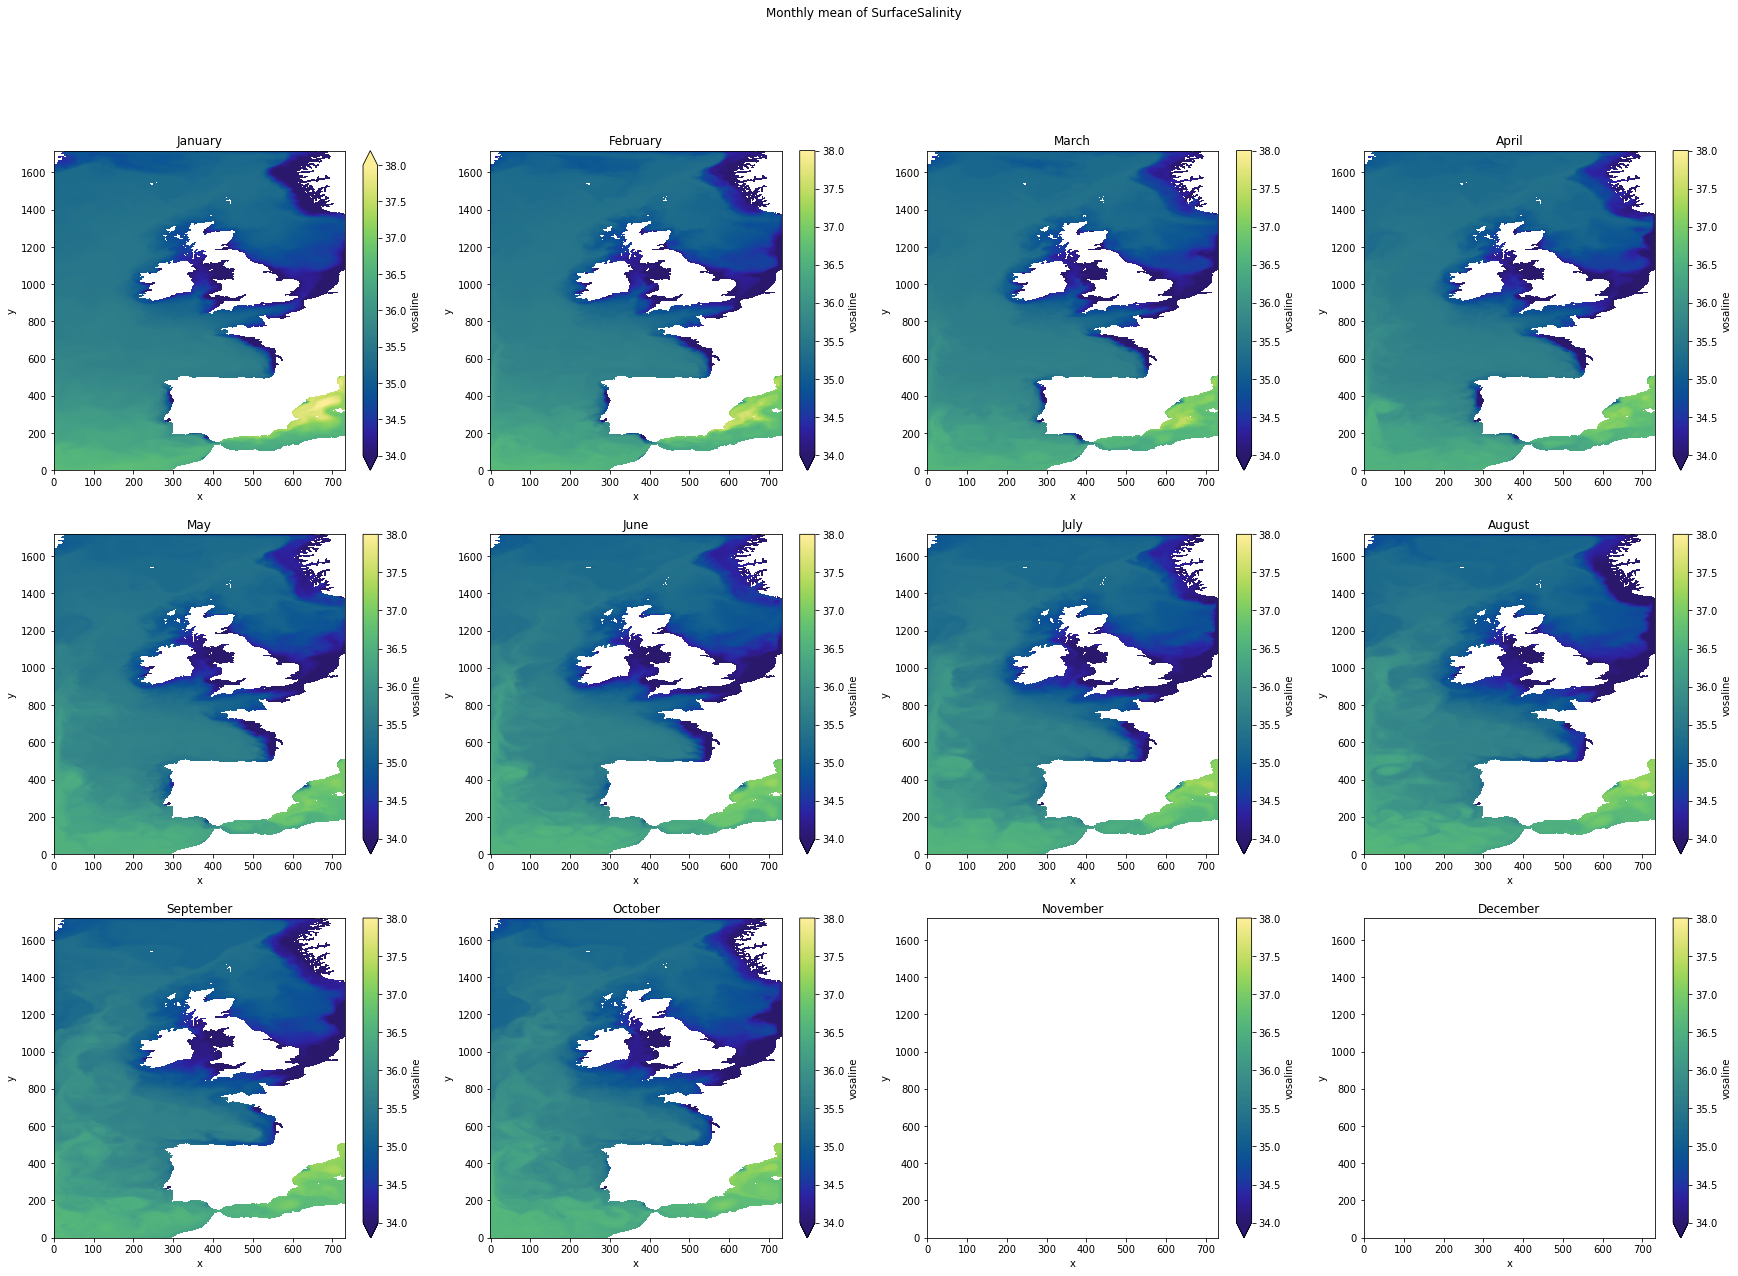

In [78]:
plot_monthly(sal[:,0],'Salinity',34,38,'cmo.haline')


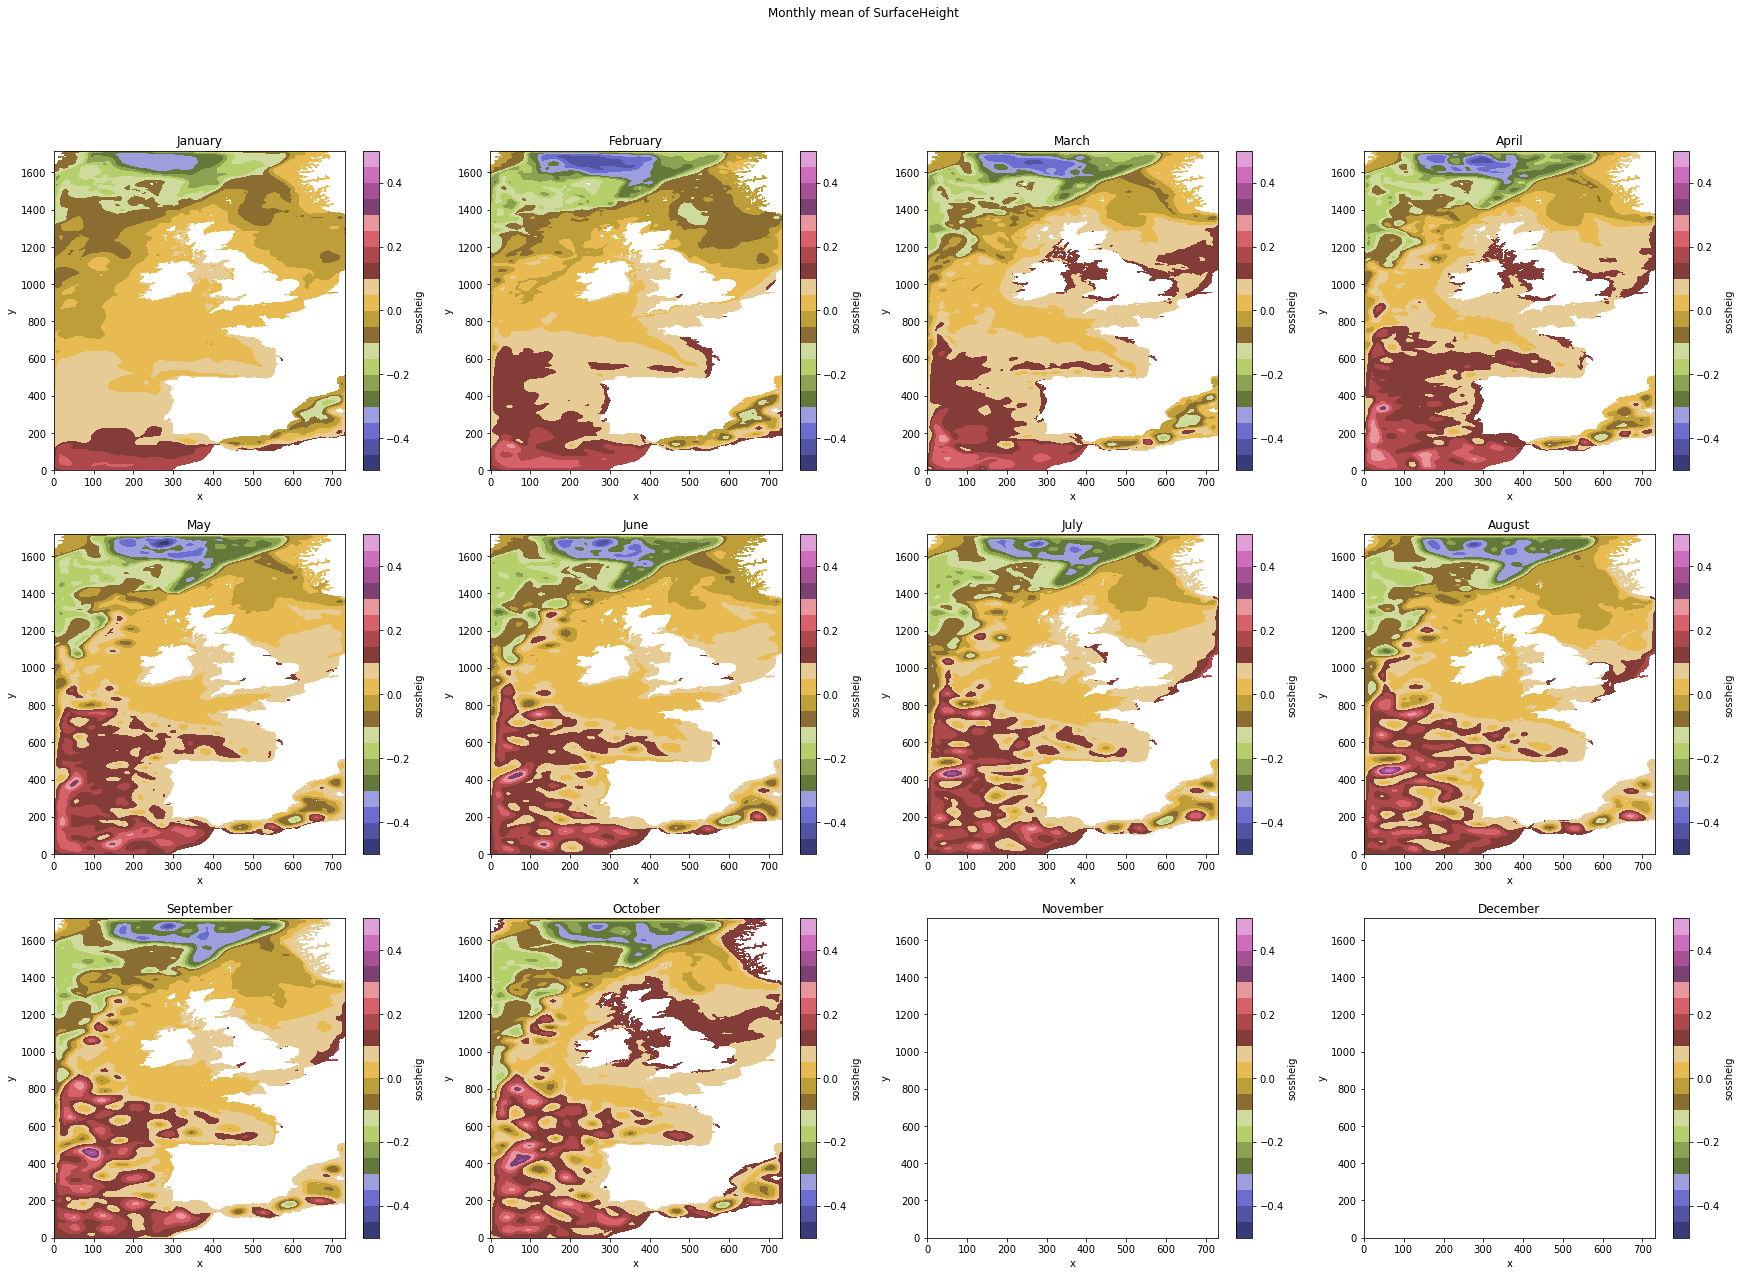

In [80]:
plot_monthly(ssh,'Height',-0.5,0.5,'tab20b')
